<a href="https://colab.research.google.com/github/FELIX-GEORGE/twitter_tweets_NLP/blob/main/NLP_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DATASETS/twitter_validation.csv",names=["id","location","target","text"])
df

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.isna().sum()

id          0
location    0
target      0
text        0
dtype: int64

In [ ]:
df["target"].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

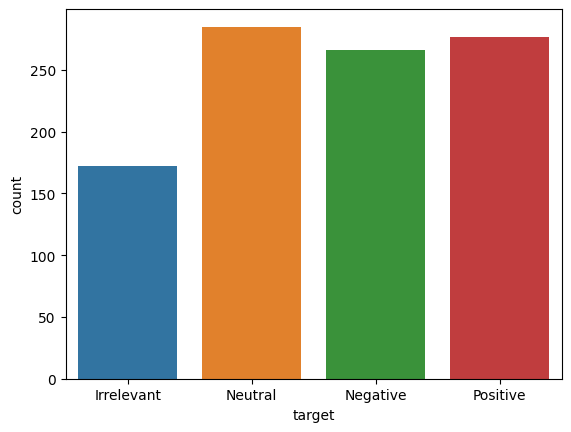

In [ ]:
import seaborn as sn
sn.countplot(x="target",data=df)

In [ ]:
df=df.drop(["id","location"],axis=1)
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
print(df)

         target                                               text
0    Irrelevant  I mentioned on Facebook that I was struggling ...
1       Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
2      Negative  @Microsoft Why do I pay for WORD when it funct...
3      Negative  CSGO matchmaking is so full of closet hacking,...
4       Neutral  Now the President is slapping Americans in the...
..          ...                                                ...
995  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...
996  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997    Positive  Today sucked so it’s time to drink wine n play...
998    Positive  Bought a fraction of Microsoft today. Small wins.
999     Neutral  Johnson & Johnson to stop selling talc baby po...

[1000 rows x 2 columns]


In [ ]:
df= df.drop(df[df['target'] =="Irrelevant"].index)
df

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.reset_index(drop=True)

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df["target"]=df["target"].map({"Negative":-1,"Positive":1,"Neutral":0})
df

,target,text
1,0,BBC News - Amazon boss Jeff Bezos rejects clai...
2,-1,@Microsoft Why do I pay for WORD when it funct...
3,-1,"CSGO matchmaking is so full of closet hacking,..."
4,0,Now the President is slapping Americans in the...
5,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,-1,Please explain how this is possible! How can t...
994,1,Good on Sony. As much as I want to see the new...
997,1,Today sucked so it’s time to drink wine n play...
998,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
tweets=df.text
tweets

1      BBC News - Amazon boss Jeff Bezos rejects clai...
2      @Microsoft Why do I pay for WORD when it funct...
3      CSGO matchmaking is so full of closet hacking,...
4      Now the President is slapping Americans in the...
5      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
993    Please explain how this is possible! How can t...
994    Good on Sony. As much as I want to see the new...
997    Today sucked so it’s time to drink wine n play...
998    Bought a fraction of Microsoft today. Small wins.
999    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ")
tweets

<ipython-input-32-961212271a38>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ")


1      BBC News Amazon boss Jeff Bezos rejects claims...
2       Microsoft Why do I pay for WORD when it funct...
3      CSGO matchmaking is so full of closet hacking ...
4      Now the President is slapping Americans in the...
5      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
993    Please explain how this is possible How can th...
994    Good on Sony As much as I want to see the new ...
997    Today sucked so it s time to drink wine n play...
998     Bought a fraction of Microsoft today Small wins 
999    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer("english")
tk=TweetTokenizer()


In [ ]:
tweets=tweets.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:" ".join(token))
tweets

1      bbc news amazon boss jeff bezo reject claim co...
2      microsoft whi do i pay for word when it functi...
3      csgo matchmak is so full of closet hack it s a...
4      now the presid is slap american in the face th...
5      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
993    pleas explain how this is possibl how can they...
994    good on soni as much as i want to see the new ...
997    today suck so it s time to drink wine n play b...
998       bought a fraction of microsoft today small win
999    johnson johnson to stop sell talc babi powder ...
Name: text, Length: 828, dtype: object

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
sw=stopwords.words("english")
sw


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
tweets=tweets.apply(lambda x:[token for token in tk.tokenize(x) if token not in sw]).apply(lambda token:" ".join(token))
tweets

1      bbc news amazon boss jeff bezo reject claim co...
2      microsoft whi pay word function poor samsungus...
3           csgo matchmak full closet hack truli aw game
4      presid slap american face realli commit unlaw ...
5      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
993    pleas explain possibl let compani overcharg sc...
994    good soni much want see new ps5 go right much ...
997    today suck time drink wine n play borderland s...
998            bought fraction microsoft today small win
999    johnson johnson stop sell talc babi powder u c...
Name: text, Length: 828, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(tweets)
print(X)

  (0, 739)	0.2456282916977699
  (0, 526)	0.2456282916977699
  (0, 3601)	0.19717097284763976
  (0, 883)	0.11802111433875656
  (0, 1060)	0.2456282916977699
  (0, 1189)	0.22139963227270484
  (0, 2091)	0.12503547156807654
  (0, 347)	0.2135997461023189
  (0, 912)	0.16343698819954885
  (0, 857)	0.2018385048310212
  (0, 2880)	0.2456282916977699
  (0, 612)	0.2456282916977699
  (0, 1919)	0.23145543449136263
  (0, 679)	0.2135997461023189
  (0, 417)	0.14270670271218175
  (0, 2392)	0.365996231282465
  (0, 581)	0.46291086898272527
  (1, 847)	0.4055823664694651
  (1, 3016)	0.4055823664694651
  (1, 2673)	0.3821800909185634
  (1, 1474)	0.4055823664694651
  (1, 3821)	0.36557591217188057
  (1, 2575)	0.3126902562590763
  (1, 3780)	0.26216072802580975
  (1, 2254)	0.24555654927912696
  :	:
  (825, 677)	0.22981061112100945
  (825, 1053)	0.2315686698425631
  (825, 3504)	0.21750175079084832
  (825, 3354)	0.2904718522758868
  (825, 2641)	0.17148706662740873
  (826, 1449)	0.5079831062080814
  (826, 3197)	0.4786

In [ ]:
vectorizer.get_feature_names_out()#to get unique features

array(['00', '00016', '005', ..., 'ztl', 'zyot', 'zysola'], dtype=object)

In [ ]:
X.shape

(828, 3931)

In [ ]:
y=df["target"]
y

1      0
2     -1
3     -1
4      0
5     -1
      ..
993   -1
994    1
997    1
998    1
999    0
Name: target, Length: 828, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


result for SVC():
              precision    recall  f1-score   support

          -1       0.63      0.55      0.59        74
           0       0.52      0.81      0.63        81
           1       0.73      0.44      0.55        94

    accuracy                           0.59       249
   macro avg       0.63      0.60      0.59       249
weighted avg       0.63      0.59      0.59       249

result for KNeighborsClassifier():
              precision    recall  f1-score   support

          -1       0.39      0.85      0.53        74
           0       0.50      0.31      0.38        81
           1       0.69      0.27      0.38        94

    accuracy                           0.45       249
   macro avg       0.53      0.48      0.43       249
weighted avg       0.54      0.45      0.43       249

result for RandomForestClassifier():
              precision    recall  f1-score   support

          -1       0.49      0.74      0.59        74
           0       0.55      0.57      

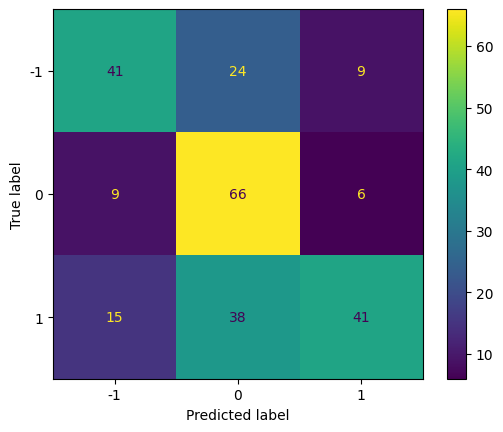

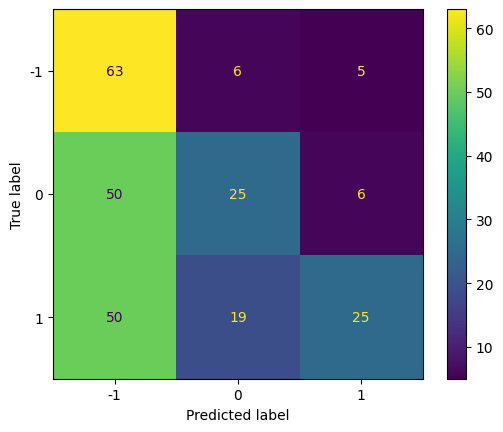

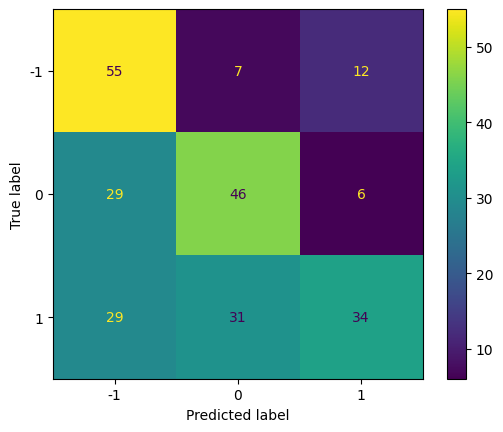

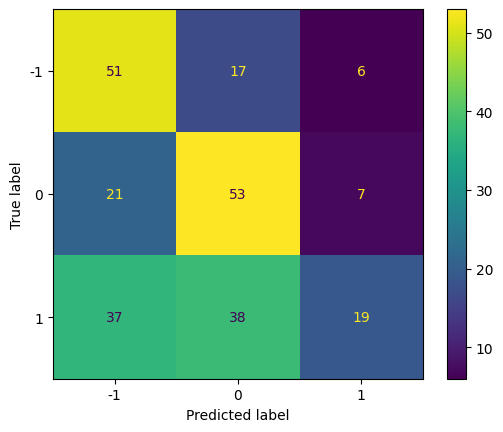

In [ ]:


sc=SVC()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
lit=[sc,kn,rf,ab]
for i in lit:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(f"result for {i}:")
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


In [ ]:
#prediction
y_new=rf.predict(vectorizer.transform([" Bbc news amazon boss jeff bezo reject claim"]))
y_new

array([-1])